In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
df = pd.read_csv(r'C:\Users\Asia\Desktop\Università\Magistrale\Data Mining\Dm 2\Progetto\Dataset\dataframe_classification.csv',  header=0, parse_dates=True, squeeze=True)

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Hours,Office_Hours,Working_day,Time_blocks_0,Time_blocks_1,Time_blocks_2,Time_blocks_3,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,14,1,1,0,0,1,0,1
1,23.7180,26.290,578.400000,760.400000,0.004773,14,1,1,0,0,1,0,1
2,23.7300,26.230,572.666667,769.666667,0.004765,14,1,1,0,0,1,0,1
3,23.7225,26.125,493.750000,774.750000,0.004744,14,1,1,0,0,1,0,1
4,23.7540,26.200,488.600000,779.000000,0.004767,14,1,1,0,0,1,0,1


In [4]:
y_name = 'Light'
columns2remove = ['Occupancy','Office_Hours', 'Working_day', 'Time_blocks_0',
                  'Time_blocks_1', 'Time_blocks_2', 'Time_blocks_3', 'Hours'] #elimino le colonne binarie
df.drop(columns2remove, inplace=True, axis=1)

In [5]:
df.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')

In [6]:
#normalizzazione
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns = ['Temperature', 'Light', 'CO2', 'HumidityRatio', 'Humidity']
scaler.fit(np.array(df[columns]))
df[columns] = scaler.transform(np.array(df[columns]))
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,0.869029,0.418677,0.344793,0.202224,0.549737
1,0.872357,0.419468,0.340787,0.208956,0.551972
2,0.874576,0.416831,0.337409,0.214525,0.549997
3,0.873190,0.412217,0.290912,0.217581,0.544374
4,0.879014,0.415513,0.287877,0.220135,0.550376


# Data Partitioning

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [8]:
attributes = [col for col in df.columns if col != y_name]
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# MULTIPLE Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.30636733 -0.20919195  0.09942826  0.2435824 ]
Intercept: 
 -0.04712579075676088


In [13]:
y_pred = reg.predict(X_test)

In [14]:
print('R2: %.3f' % r2_score(y_test, y_pred)) #coefficiente di determinazione
print('MSE: %.3f' % mean_squared_error(y_test, y_pred)) #errore quadratico medio
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred)) #errore assoluto medio

R2: 0.501
MSE: 0.008
MAE: 0.069


**LASSO**

di default si ha alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic'

In [15]:
param_list = {'alpha': [1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4]}

reg = Lasso()
grid_search = GridSearchCV(reg, param_grid=param_list, cv=100)
grid_search.fit(X, y)
reg = grid_search.best_estimator_

print(grid_search.best_params_)

{'alpha': 0.0001}


In [16]:
reg = Lasso(alpha=0.0001)
reg.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.38754544 0.         0.10505834 0.01094174]
Intercept: 
 -0.0818947944723092


In [18]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.501
MSE: 0.008
MAE: 0.069


**RIDGE**

In [19]:
param_list = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4,1e5]}

reg = Ridge()
grid_search = GridSearchCV(reg, param_grid=param_list, cv=100)
grid_search.fit(X, y)
reg = grid_search.best_estimator_

print(grid_search.best_params_)

{'alpha': 1}


In [38]:
reg = Ridge(alpha = 1)
reg.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [39]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.33847108 -0.12655669  0.10235922  0.152076  ]
Intercept: 
 -0.06115195488326343


In [40]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.501
MSE: 0.008
MAE: 0.069


## Linear Regression in 2 dimensions

In [41]:
y_name = 'Light'
# suddividi il dataset
attributes = ['Temperature']
X = df[attributes].values
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [42]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.475
MSE: 0.008
MAE: 0.071


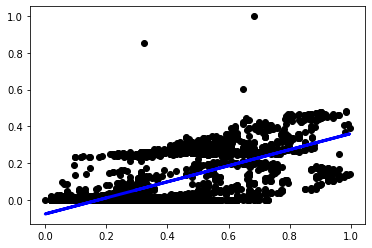

In [43]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

# Lasso

In [44]:
param_list = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4,1e5]}

reg = Lasso()
grid_search = GridSearchCV(reg, param_grid=param_list, cv=100)
grid_search.fit(X, y)
reg = grid_search.best_estimator_

print(grid_search.best_params_)

{'alpha': 1e-05}


In [45]:
reg = Lasso(alpha = 0.00001)
reg.fit(X_train.T[0].reshape(-1, 1), y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.43740915]
Intercept: 
 -0.07737296570890533


In [47]:
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.475
MSE: 0.008
MAE: 0.071


# Ridge

In [48]:
param_list = {'alpha': [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e2,1e3,1e4,1e5]}

reg = Ridge()
grid_search = GridSearchCV(reg, param_grid=param_list, cv=100)
grid_search.fit(X, y)
reg = grid_search.best_estimator_

print(grid_search.best_params_)

{'alpha': 1e-05}


In [49]:
reg = Ridge(alpha = 0.00001)
reg.fit(X_train.T[0].reshape(-1, 1), y_train)

Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.4376723]
Intercept: 
 -0.07746565142229982


In [51]:
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.475
MSE: 0.008
MAE: 0.071
